## SpaCy , TF-IDF

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
%reload_ext autoreload

import pandas as pd
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from mentalhealth.model_training_testing import train_and_evaluate_model

from mentalhealth.model_training_testing import display_performance_metrics

from mentalhealth.data_visualization import plot_roc_curve_multiclass

In [2]:
mental_health_train_df = pd.read_parquet('tokenized_and_lemmatized_train_data.parquet')
mental_health_test_df = pd.read_parquet('tokenized_and_lemmatized_test_data.parquet')

X_train = mental_health_train_df['lemmatized_tokens']
y_train = mental_health_train_df['target']

X_test = mental_health_test_df['lemmatized_tokens']
y_test = mental_health_test_df['target']

In [3]:
%%time
y_test_logistic, y_pred_logistic, y_pred_proba_logistic, model_name_logistic, target_names_logistic = \
    train_and_evaluate_model(X_train, y_train, X_test, y_test, model_type='logistic')

Model saved as ONNX at logistic_mental_health.onnx
CPU times: user 4min 39s, sys: 11.4 s, total: 4min 50s
Wall time: 4min 51s


In [4]:
%%time
metrics_logistic = display_performance_metrics(y_test_logistic, y_pred_logistic, model_name_logistic)

Model: Logistic Regression
Accuracy: 0.8081
Precision: 0.7988
Recall: 0.8081
F1 Score: 0.8002
Classification Report:
                   precision    recall  f1-score   support

  COVID19_support       0.51      0.16      0.25       196
      EDAnonymous       0.82      0.68      0.75      2916
        addiction       0.73      0.61      0.66      1528
             adhd       0.84      0.79      0.81      9126
       alcoholism       0.75      0.66      0.70      1182
          anxiety       0.67      0.65      0.66     11534
           autism       0.84      0.59      0.70      1774
    bipolarreddit       0.65      0.37      0.47      1156
              bpd       0.80      0.58      0.67      4859
       depression       0.56      0.64      0.60     23466
    healthanxiety       0.73      0.53      0.61      1730
           lonely       0.59      0.48      0.53      4727
     mentalhealth       0.45      0.30      0.36      9067
non_mental_health       0.91      0.98      0.94    1268

In [5]:
%%time
y_test_nb, y_pred_nb, y_pred_proba_nb, model_name_nb, target_names_nb = \
    train_and_evaluate_model(X_train, y_train, X_test, y_test, model_type='nb')

Model saved as ONNX at nb_mental_health.onnx
CPU times: user 1min 13s, sys: 2.22 s, total: 1min 15s
Wall time: 1min 16s


In [6]:
%%time
metrics_nb = display_performance_metrics(y_test_nb, y_pred_nb, model_name_nb)

Model: Naive Bayes
Accuracy: 0.7363
Precision: 0.7344
Recall: 0.7363
F1 Score: 0.7121
Classification Report:
                   precision    recall  f1-score   support

  COVID19_support       0.00      0.00      0.00       196
      EDAnonymous       0.69      0.53      0.60      2916
        addiction       0.73      0.30      0.43      1528
             adhd       0.78      0.62      0.69      9126
       alcoholism       0.79      0.37      0.50      1182
          anxiety       0.58      0.46      0.51     11534
           autism       0.86      0.32      0.47      1774
    bipolarreddit       0.62      0.16      0.25      1156
              bpd       0.82      0.36      0.50      4859
       depression       0.42      0.70      0.52     23466
    healthanxiety       0.65      0.39      0.49      1730
           lonely       0.56      0.20      0.30      4727
     mentalhealth       0.37      0.14      0.20      9067
non_mental_health       0.85      0.96      0.90    126898
     

In [7]:
%%time
y_test_lgbm, y_pred_lgbm, y_pred_proba_lgbm, model_name_lgbm, target_names_lgbm = \
    train_and_evaluate_model(X_train, y_train, X_test, y_test, model_type='lgbm')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 4.362837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 827999
[LightGBM] [Info] Number of data points in the train set: 885841, number of used features: 5000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/Users/keshavelango/Documents/GitHub/capstone/final_repo_push/Mental-Health-Analysis-using-Social-Media-Data/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/keshavelango/Documents/GitHub/capstone/final_repo_push/Mental-Health-Analysis-using-Social-Media-Data/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CPU times: user 9min 27s, sys: 20.1 s, total: 9min 47s
Wall time: 2min 28s


In [8]:
%%time
metrics_lgbm = display_performance_metrics(y_test_lgbm, y_pred_lgbm, model_name_lgbm)

Model: LightGBM
Accuracy: 0.7747
Precision: 0.7570
Recall: 0.7747
F1 Score: 0.7555
Classification Report:
                   precision    recall  f1-score   support

  COVID19_support       0.35      0.08      0.13       196
      EDAnonymous       0.85      0.55      0.67      2916
        addiction       0.71      0.53      0.61      1528
             adhd       0.87      0.68      0.77      9126
       alcoholism       0.72      0.59      0.65      1182
          anxiety       0.64      0.63      0.64     11534
           autism       0.79      0.63      0.70      1774
    bipolarreddit       0.61      0.36      0.45      1156
              bpd       0.85      0.55      0.67      4859
       depression       0.55      0.56      0.55     23466
    healthanxiety       0.73      0.31      0.44      1730
           lonely       0.58      0.37      0.45      4727
     mentalhealth       0.50      0.17      0.26      9067
non_mental_health       0.85      0.98      0.91    126898
        

In [9]:
%%time 
y_test_xgb, y_pred_xgb, y_pred_proba_xgb ,model_name_xgb, target_names_xgb = \
    train_and_evaluate_model(X_train, y_train, X_test, y_test, model_type='xgb')

/Users/keshavelango/Documents/GitHub/capstone/final_repo_push/Mental-Health-Analysis-using-Social-Media-Data/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:19:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model saved as ONNX at xgb_mental_health.onnx
CPU times: user 35min 6s, sys: 27.2 s, total: 35min 33s
Wall time: 7min 43s


In [10]:
%%time
metrics_xgb = display_performance_metrics(y_test_xgb, y_pred_xgb, model_name_xgb)

Model: XGBoost
Accuracy: 0.7989
Precision: 0.7858
Recall: 0.7989
F1 Score: 0.7875
Classification Report:
                   precision    recall  f1-score   support

  COVID19_support       0.39      0.09      0.15       196
      EDAnonymous       0.85      0.67      0.75      2916
        addiction       0.71      0.61      0.66      1528
             adhd       0.87      0.75      0.80      9126
       alcoholism       0.76      0.67      0.71      1182
          anxiety       0.66      0.66      0.66     11534
           autism       0.82      0.66      0.73      1774
    bipolarreddit       0.64      0.43      0.52      1156
              bpd       0.83      0.59      0.69      4859
       depression       0.55      0.60      0.58     23466
    healthanxiety       0.72      0.46      0.56      1730
           lonely       0.58      0.45      0.51      4727
     mentalhealth       0.48      0.25      0.33      9067
non_mental_health       0.89      0.98      0.93    126898
         

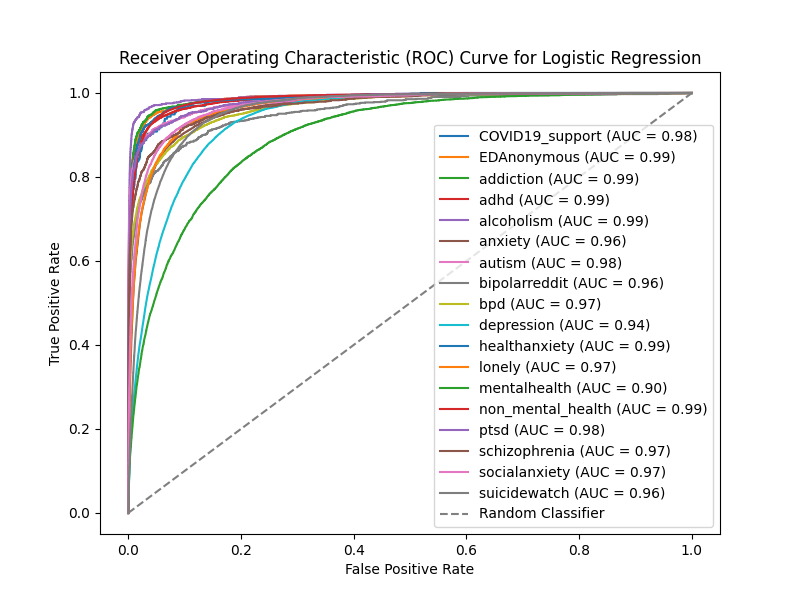

In [11]:
plot_roc_curve_multiclass(y_test_logistic, y_pred_proba_logistic, model_name_logistic, target_names_logistic)

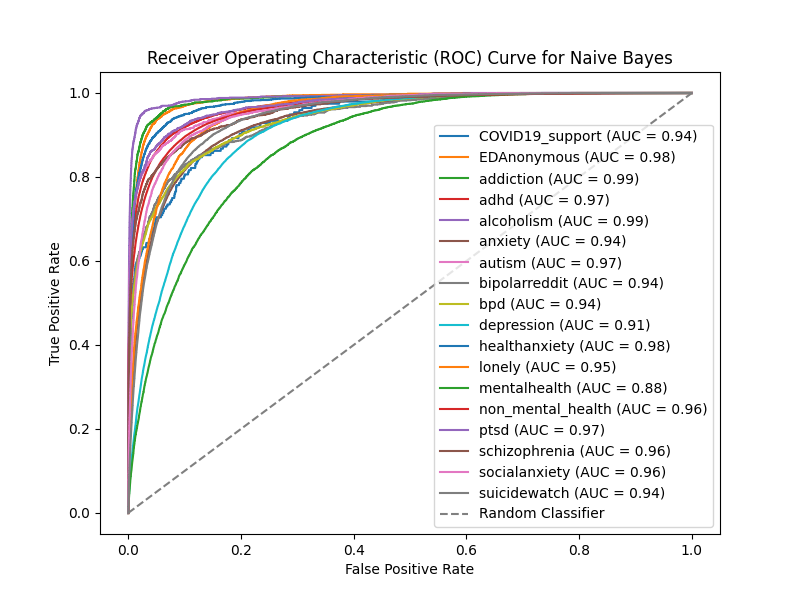

In [12]:
plot_roc_curve_multiclass(y_test_nb, y_pred_proba_nb, model_name_nb, target_names_nb)

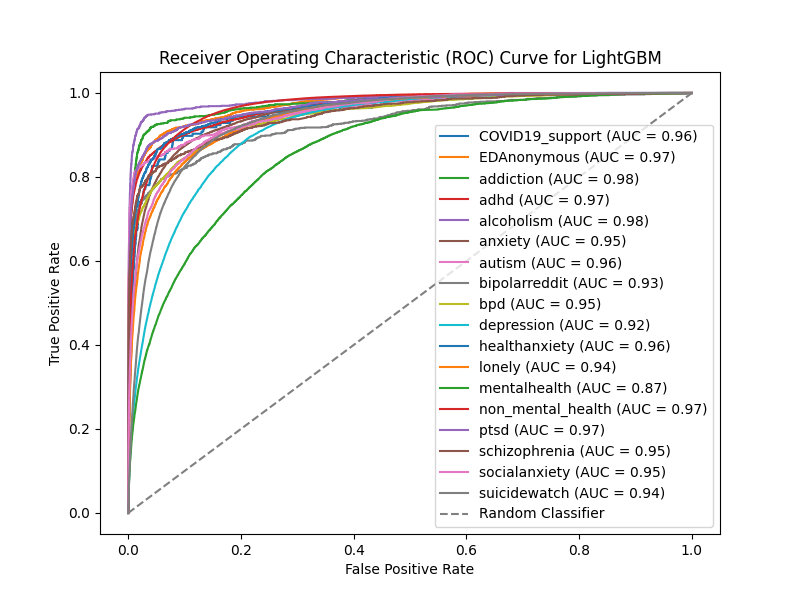

In [13]:
plot_roc_curve_multiclass(y_test, y_pred_proba_lgbm, model_name_lgbm, target_names_lgbm)

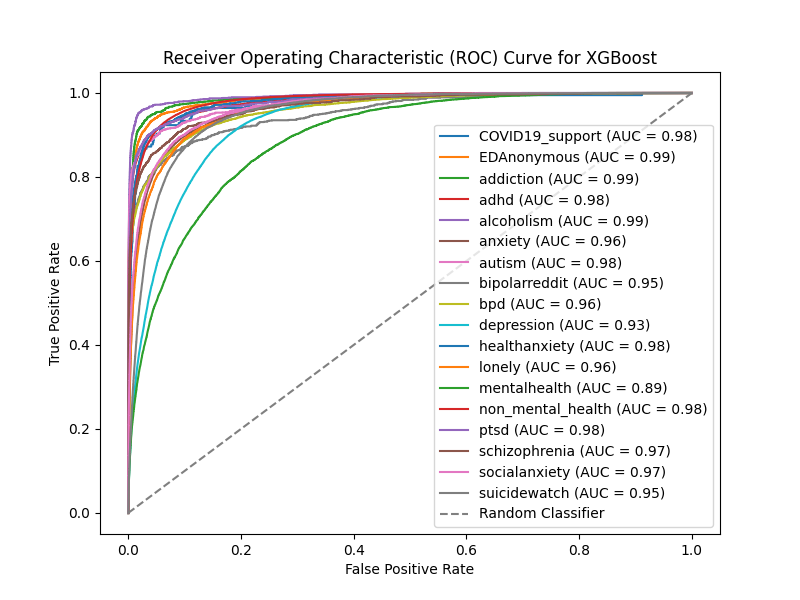

In [14]:
plot_roc_curve_multiclass(y_test, y_pred_proba_xgb, model_name_xgb, target_names_xgb)